In [54]:
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:
# Les fichiers disponibles
INGREDIENTS = {
    "REF_ICA_INGREDIENT_AUTRE.csv",
    "REF_ICA_MICRO_ORGANISME.csv",
    "REF_ICA_PLANTE.csv",
    "REF_ICA_SUBSTANCE_ACTIVE.csv",
}
LIENS_INGREDIENTS_SUBSTANCES = {
    "REF_ICA_AUTREING_SUBSTACTIVE.csv",
    "REF_ICA_PLANTE_SUBSTANCE.csv"
    # Manque MOORG_SUBSTANCE
}

SYNONYMES = {
    "REF_ICA_INGREDIENT_AUTRE_SYNONYME.csv",
    "REF_ICA_PLANTE_SYNONYME.csv",
    "REF_ICA_SUBSTANCE_ACTIVE_SYNONYME.csv",
}

# Substances

In [56]:
substance_df = pd.read_csv("../raw_data/REF_ICA_SUBSTANCE_ACTIVE.csv")
substance_df.describe()

,SBSACT_IDENT,STINGSBS_IDENT,TYSUBST_IDENT,UNT_IDENT,SBSACT_QUANTITE_ARENSEIGNER,SBSACT_QTE_MIN,SBSACT_OBSOLET,SBSACT_ORDRE
count,849.000000,849.000000,849.000000,849.000000,849.000000,0.0,849.000000,0.0
mean,429.612485,2.985866,4.351001,2.939929,0.114252,NaN,0.003534,NaN
std,251.372918,1.399052,1.120879,0.332827,0.318305,NaN,0.059374,NaN
min,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,NaN
25%,213.000000,1.000000,3.000000,3.000000,0.000000,NaN,0.000000,NaN
50%,425.000000,4.000000,5.000000,3.000000,0.000000,NaN,0.000000,NaN
75%,642.000000,4.000000,5.000000,3.000000,0.000000,NaN,0.000000,NaN
max,873.000000,4.000000,6.000000,3.000000,1.000000,NaN,1.000000,NaN


In [57]:
substance_df.columns

Index(['SBSACT_IDENT', 'STINGSBS_IDENT', 'TYSUBST_IDENT', 'UNT_IDENT',
       'SBSACT_LIBELLE', 'SBSACT_LIBELLE_EN', 'SBSACT_COMMENTAIRE_PUBLIC',
       'SBSACT_COMMENTAIRE_PUBLIC_EN', 'SBSACT_COMMENTAIRE_PRIVE',
       'SBSACT_COMMENTAIRE_PRIVE_EN', 'SBSACT_NUMERO_CAS', 'SBSACT_SOURCE',
       'SBSACT_SOURCE_EN', 'SBSACT_QUANTITE_ARENSEIGNER', 'SBSACT_QTE_MIN',
       'SBSACT_QTE_MAX', 'SBSACT_NUM_EINECS', 'SBSACT_APPORT_REF',
       'SBSACT_OBSOLET', 'SBSACT_ORDRE'],
      dtype='object')

In [58]:
substance_df.count()

SBSACT_IDENT                    849
STINGSBS_IDENT                  849
TYSUBST_IDENT                   849
UNT_IDENT                       849
SBSACT_LIBELLE                  849
SBSACT_LIBELLE_EN               274
SBSACT_COMMENTAIRE_PUBLIC        66
SBSACT_COMMENTAIRE_PUBLIC_EN      4
SBSACT_COMMENTAIRE_PRIVE        125
SBSACT_COMMENTAIRE_PRIVE_EN      11
SBSACT_NUMERO_CAS                34
SBSACT_SOURCE                    15
SBSACT_SOURCE_EN                  5
SBSACT_QUANTITE_ARENSEIGNER     849
SBSACT_QTE_MIN                    0
SBSACT_QTE_MAX                   84
SBSACT_NUM_EINECS                10
SBSACT_APPORT_REF                28
SBSACT_OBSOLET                  849
SBSACT_ORDRE                      0
dtype: int64

<Axes: xlabel='count', ylabel='SBSACT_SOURCE'>

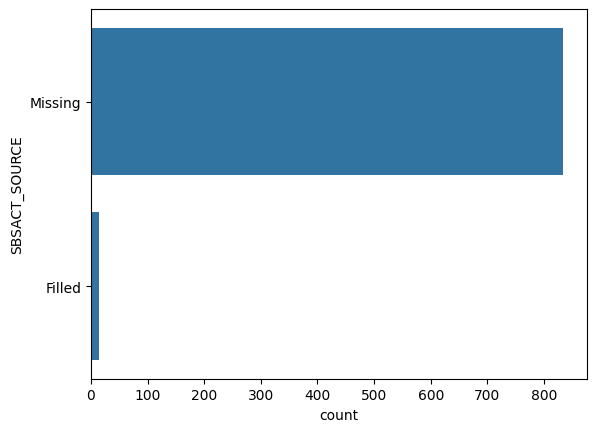

In [59]:
sns.countplot(data=substance_df["SBSACT_SOURCE"].apply(lambda x: "Filled" if not pd.isnull(x) else np.nan).fillna("Missing"))

In [60]:
def clean_value(value):
    if value == "NULL":
        return None
    if value == "":
        return None
    if value == np.nan:
        return None
    else:
        return value

initial_columns = substance_df.columns
for column in initial_columns:
    substance_df[f"clean_{column}"] = substance_df[column].apply(lambda x: clean_value(x))

In [61]:
filled_substance_df = substance_df[initial_columns].copy()
for column in initial_columns:
    filled_substance_df[column] = substance_df[f"clean_{column}"].apply(lambda x: "Filled" if not pd.isnull(x) else np.nan).fillna("Missing")
filled_substance_df.describe()

,SBSACT_IDENT,STINGSBS_IDENT,TYSUBST_IDENT,UNT_IDENT,SBSACT_LIBELLE,SBSACT_LIBELLE_EN,SBSACT_COMMENTAIRE_PUBLIC,SBSACT_COMMENTAIRE_PUBLIC_EN,SBSACT_COMMENTAIRE_PRIVE,SBSACT_COMMENTAIRE_PRIVE_EN,SBSACT_NUMERO_CAS,SBSACT_SOURCE,SBSACT_SOURCE_EN,SBSACT_QUANTITE_ARENSEIGNER,SBSACT_QTE_MIN,SBSACT_QTE_MAX,SBSACT_NUM_EINECS,SBSACT_APPORT_REF,SBSACT_OBSOLET,SBSACT_ORDRE
count,849,849,849,849,849,849,849,849,849,849,849,849,849,849,849,849,849,849,849,849
unique,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,2,2,2,1,1
top,Filled,Filled,Filled,Filled,Filled,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Filled,Missing,Missing,Missing,Missing,Filled,Missing
freq,849,849,849,849,849,575,783,845,724,838,815,834,844,849,849,765,839,821,849,849


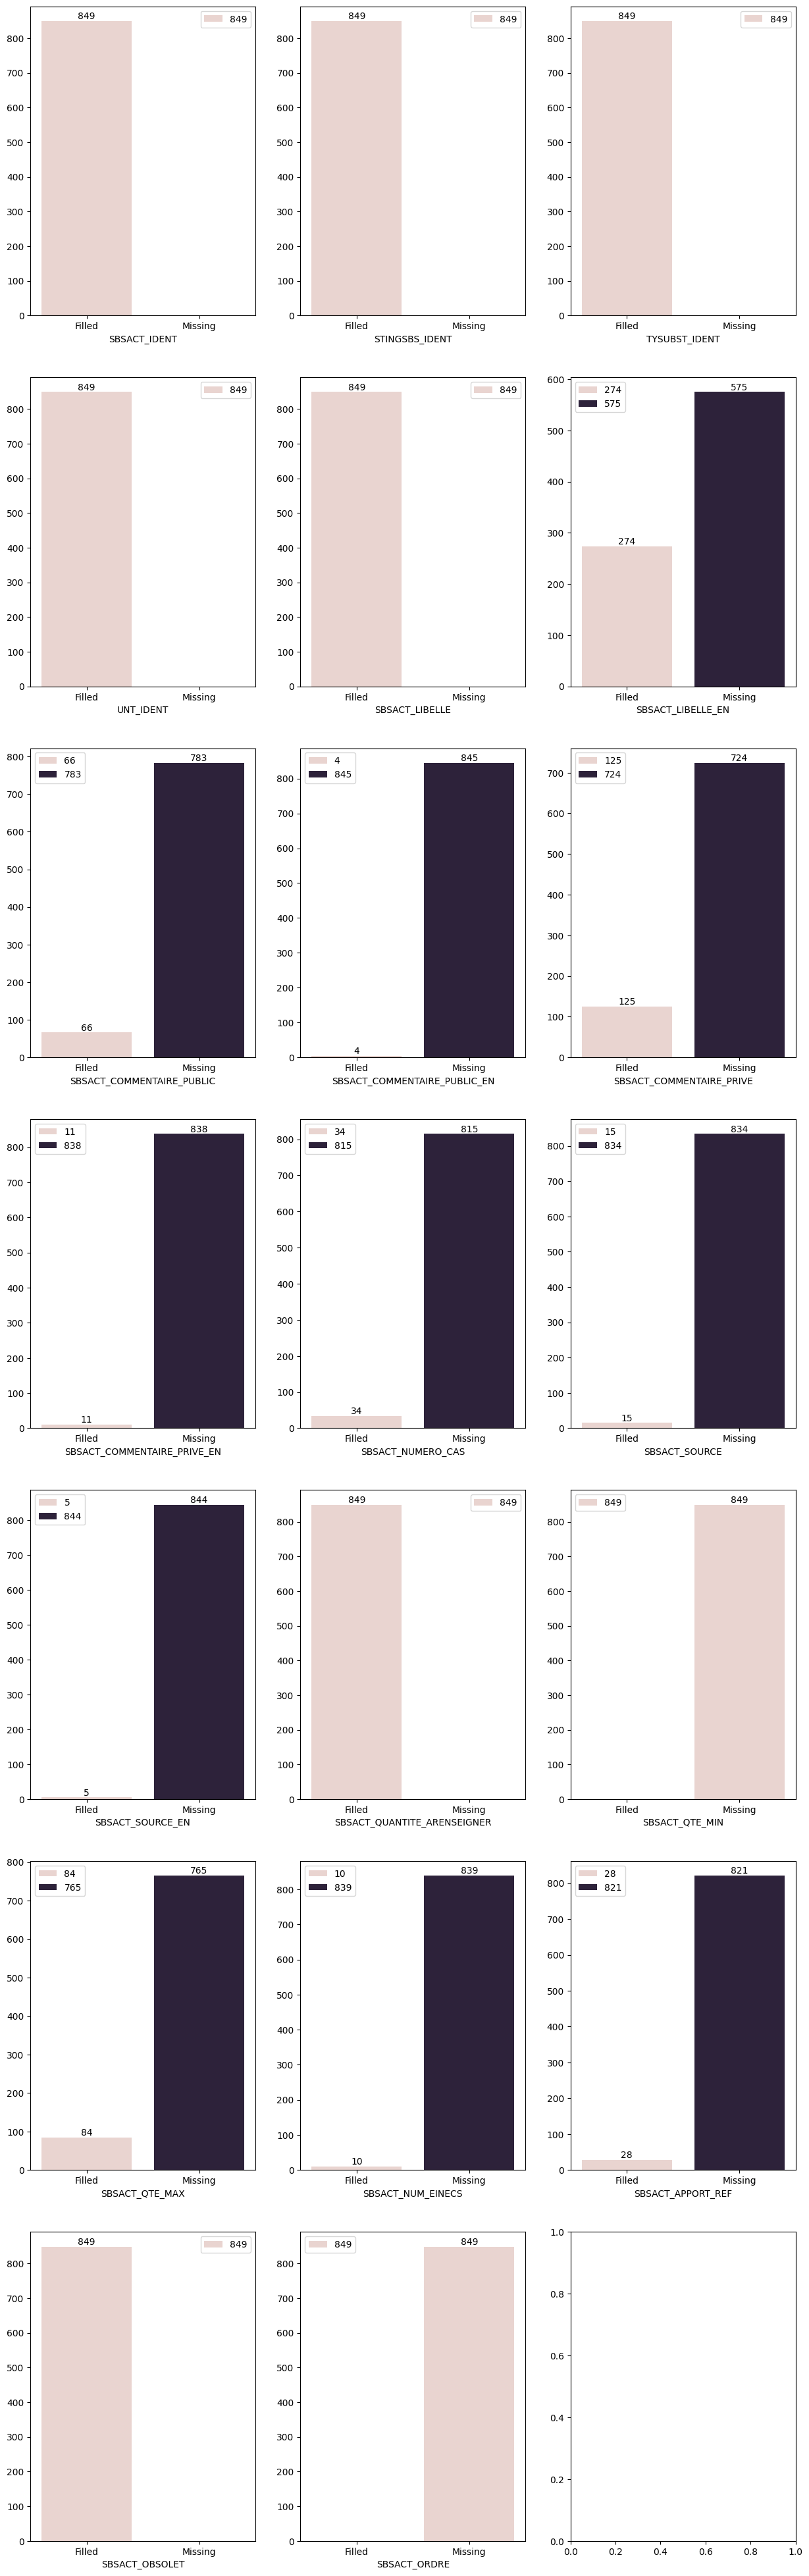

In [62]:
fig, ax = plt.subplots(7, 3, figsize = (15, 50))
for i, subplots in zip (filled_substance_df, ax.flatten()):  
  s = filled_substance_df[i].value_counts()
  s = filled_substance_df[i].value_counts().rename_axis(i).rename('count')
  op = sns.barplot(x=s.index, y=s.values, hue=s.values, order=['Filled', 'Missing'], ax = subplots)
  # ajout des count en légende sur chaque bar
  for container in op.containers:
    op.bar_label(container)
plt.show()


In [63]:
# Quel est le plus court libellé ?
substance_df['lenSBSACT_LIBELLE'] = substance_df['SBSACT_LIBELLE'].apply(lambda x: len(x))
min(substance_df['lenSBSACT_LIBELLE'])

3

In [64]:
# Qu'y a t'il dans les colonnes peu remplies ?

for column in initial_columns:
    if (len(substance_df[column].unique()) < 30) and (len(substance_df[column].unique()) > 1) :
        print(column, len(substance_df[column].unique()))
        for elem in substance_df[column].unique():
            print(f"\t{elem}")



# il y a des num CAS dans les sources
 # il y a du wikipedia dans les commentaires privés, les sources en

STINGSBS_IDENT 4
	1
	2
	4
	3
TYSUBST_IDENT 6
	1
	2
	3
	5
	4
	6
UNT_IDENT 3
	1
	3
	2
SBSACT_COMMENTAIRE_PUBLIC_EN 4
	nan
	Novel Food - Conditions of use in : COMMISSION IMPLEMENTING REGULATION (EU) 2018/112
	Oenothein A and oenothein B, considered responsible for the activity-decrease of aromatase and 5-alpha-reductase present in prostate cells. (Belfrit)
	Informations issues d'un article scientifique publié sur le Shilajit (https://pubmed.ncbi.nlm.nih.gov/23733436/) : Various research studies indicate that shilajit exhibits antioxidant, anti-inflammatory, adaptogenic, immunomodulatory, and anti-dyslipidemic properties. Animal and human studies indicate that shilajit enhances spermatogenesis. Furthermore, animal and human data support its use as a 'revitalizer', enhancing physical performance and relieving fatigue with enhanced production of ATP. Key constituents in shilajit responsible for these effects appear to be dibenzo-a-pyrones and fulvic acid and their derivatives.
SBSACT_COMMEN

In [65]:
substance_df['SBSACT_NUMERO_CAS'].value_counts()

# le formatage de numero_cas suit différentes règles :
# XXX-XX-X
# XXXXX-XX-X
# XXXXX-XX
# XX/XX/XXXX
# TODO : methode de clean du CAS 

# le formatage du numero_einecs suit différentes règles :
# XXX-XXX
# XXXXXXX

SBSACT_NUMERO_CAS
470-82-6      1
528-53-0      1
92618-89-8    1
497-30-3      1
544-31-0      1
1135-24-6     1
41263-94-9    1
2309-49-1     1
27215-38-9    1
520-27-4      1
05/09/9030    1
644-69-9      1
537-42-8      1
491-70-3      1
539-86-6      1
41312-47-4    1
80-57-9       1
16389-88-1    1
56-81-5       1
520-34-3      1
70851-98-8    1
21593-77      1
08/09/4350    1
42553-65      1
21967-41-9    1
87-66-1       1
987-78-0      1
14791-73      1
65995-63-3    1
5508-58-7     1
9032-08-0     1
24880-45-3    1
1118-68-9     1
461-55-2      1
Name: count, dtype: int64

In [66]:
# Faire la différence entre libelle et libelle_en
# TODO améliorer avec distance de Levenstein

df_with_libelle_en = substance_df[['SBSACT_LIBELLE', 'SBSACT_LIBELLE_EN']].dropna(subset=['SBSACT_LIBELLE_EN'])
df_with_libelle_en['total/2'] = (df_with_libelle_en['SBSACT_LIBELLE'].str.len() + df_with_libelle_en['SBSACT_LIBELLE_EN'].str.len()) / 2
df_with_libelle_en

,SBSACT_LIBELLE,SBSACT_LIBELLE_EN,total/2
0,vitamine A,vitamin A,9.5
3,vitamine B9,vitamin B9,10.5
4,vitamine D,vitamin D,9.5
5,vitamine K,Vitamin K,9.5
8,vitamine B3,vitamin B3,10.5
...,...,...,...
844,dibenzo-a-Pyrones,dibenzo-a-pyrones,17.5
845,Acide palmitique,palmitic acid,14.5
846,Acide palmitoléique,palmitoleic acid,17.5
847,Acide stéarique,stearic acid,13.5


In [67]:
def compute_union(fr, en):
    return  len(set(list(fr)))


df_with_libelle_en['union'] = df_with_libelle_en.apply(lambda x : compute_union(x.SBSACT_LIBELLE, x.SBSACT_LIBELLE_EN), axis=1)
df_with_libelle_en

,SBSACT_LIBELLE,SBSACT_LIBELLE_EN,total/2,union
0,vitamine A,vitamin A,9.5,9
3,vitamine B9,vitamin B9,10.5,10
4,vitamine D,vitamin D,9.5,9
5,vitamine K,Vitamin K,9.5,9
8,vitamine B3,vitamin B3,10.5,10
...,...,...,...,...
844,dibenzo-a-Pyrones,dibenzo-a-pyrones,17.5,13
845,Acide palmitique,palmitic acid,14.5,13
846,Acide palmitoléique,palmitoleic acid,17.5,15
847,Acide stéarique,stearic acid,13.5,13


In [68]:
# Faire un tf-idf du libelle

substance_df['values'] = substance_df['SBSACT_COMMENTAIRE_PUBLIC'].str.findall(r"(?<!\d|\.)\d+(?:\.\d+)?\s*?(?:mg|kg|ml|q\.s\.|ui|M|g|µg)(?!\w)")
substance_df[['SBSACT_COMMENTAIRE_PUBLIC', 'values']]
# Enfants de moins de 10 ans : 
# Adolescents : 
# Novel Food : // nouvel aliment
# Avertissement obligatoire sur l'étiquetage: // L’étiquetage des compléments alimentaires 
# Maximum : 

# il peut y avoir des sources/liens pour un commentaire donné

# def get_values(commentaire_public):
#     return commentaire_public.extract(r'^(\d{4})'

,SBSACT_COMMENTAIRE_PUBLIC,values
0,Enfants de moins de 10 ans : 200 µg Adolescent...,"[200 µg, 500 µg]"
1,NaN,NaN
2,NaN,NaN
3,Enfants de moins de 10 ans : 100 µg Adolescent...,"[100 µg, 250 µg, 800 µg]"
4,Enfants de moins de 10 ans : 25 µg Adolescents...,"[25 µg, 50 µg]"
...,...,...
844,Les dibenzo-a-Pyrones sont des métabolites sec...,[]
845,NaN,NaN
846,NaN,NaN
847,NaN,NaN


In [69]:
# Combien d'enregistrement on des valeurs maxi dans les commentaires ?
doup = substance_df.copy()
doup = substance_df['values'].dropna()
len(doup[doup.map(lambda d: len(d)) > 0])


42

In [70]:
# Est-ce que là où il y a une valeur maxi renseignée, il y a aussi une obligation de renseigner la valeur ?

# Plantes

In [71]:
plant_df = pd.read_csv("../raw_data/REF_ICA_PLANTE.csv")
plant_df.describe()

,PLTE_IDENT,FAMPL_IDENT,FCTINGR_IDENT,STINGSBS_IDENT,PLTE_ORDRE,PLTE_OBSOLET
count,1781.000000,1781.000000,1781.0,1781.000000,0.0,1781.000000
mean,891.126334,119.167322,1.0,1.535093,NaN,0.002246
std,514.479946,70.584383,0.0,0.672517,NaN,0.047351
min,1.000000,1.000000,1.0,1.000000,NaN,0.000000
25%,446.000000,62.000000,1.0,1.000000,NaN,0.000000
50%,891.000000,124.000000,1.0,1.000000,NaN,0.000000
75%,1336.000000,186.000000,1.0,2.000000,NaN,0.000000
max,1783.000000,264.000000,1.0,3.000000,NaN,1.000000


In [72]:
plant_columns = plant_df.columns
plant_columns

Index(['PLTE_IDENT', 'FAMPL_IDENT', 'FCTINGR_IDENT', 'STINGSBS_IDENT',
       'PLTE_LIBELLE', 'PLTE_ORDRE', 'PLTE_OBSOLET', 'PLTE_COMMENTAIRE_PUBLIC',
       'PLTE_COMMENTAIRE_PUBLIC_EN', 'PLTE_COMMENTAIRE_PRIVE',
       'PLTE_COMMENTAIRE_PRIVE_EN'],
      dtype='object')

In [73]:
filled_plant_df = plant_df[plant_columns].copy()
for column in plant_columns:
    filled_plant_df[column] = plant_df[column].apply(lambda x: "Filled" if not pd.isnull(x) else np.nan).fillna("Missing")
filled_plant_df.describe()

,PLTE_IDENT,FAMPL_IDENT,FCTINGR_IDENT,STINGSBS_IDENT,PLTE_LIBELLE,PLTE_ORDRE,PLTE_OBSOLET,PLTE_COMMENTAIRE_PUBLIC,PLTE_COMMENTAIRE_PUBLIC_EN,PLTE_COMMENTAIRE_PRIVE,PLTE_COMMENTAIRE_PRIVE_EN
count,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781
unique,1,1,1,1,1,1,1,2,2,2,2
top,Filled,Filled,Filled,Filled,Filled,Missing,Filled,Missing,Missing,Filled,Missing
freq,1781,1781,1781,1781,1781,1781,1781,1161,1780,1737,1769


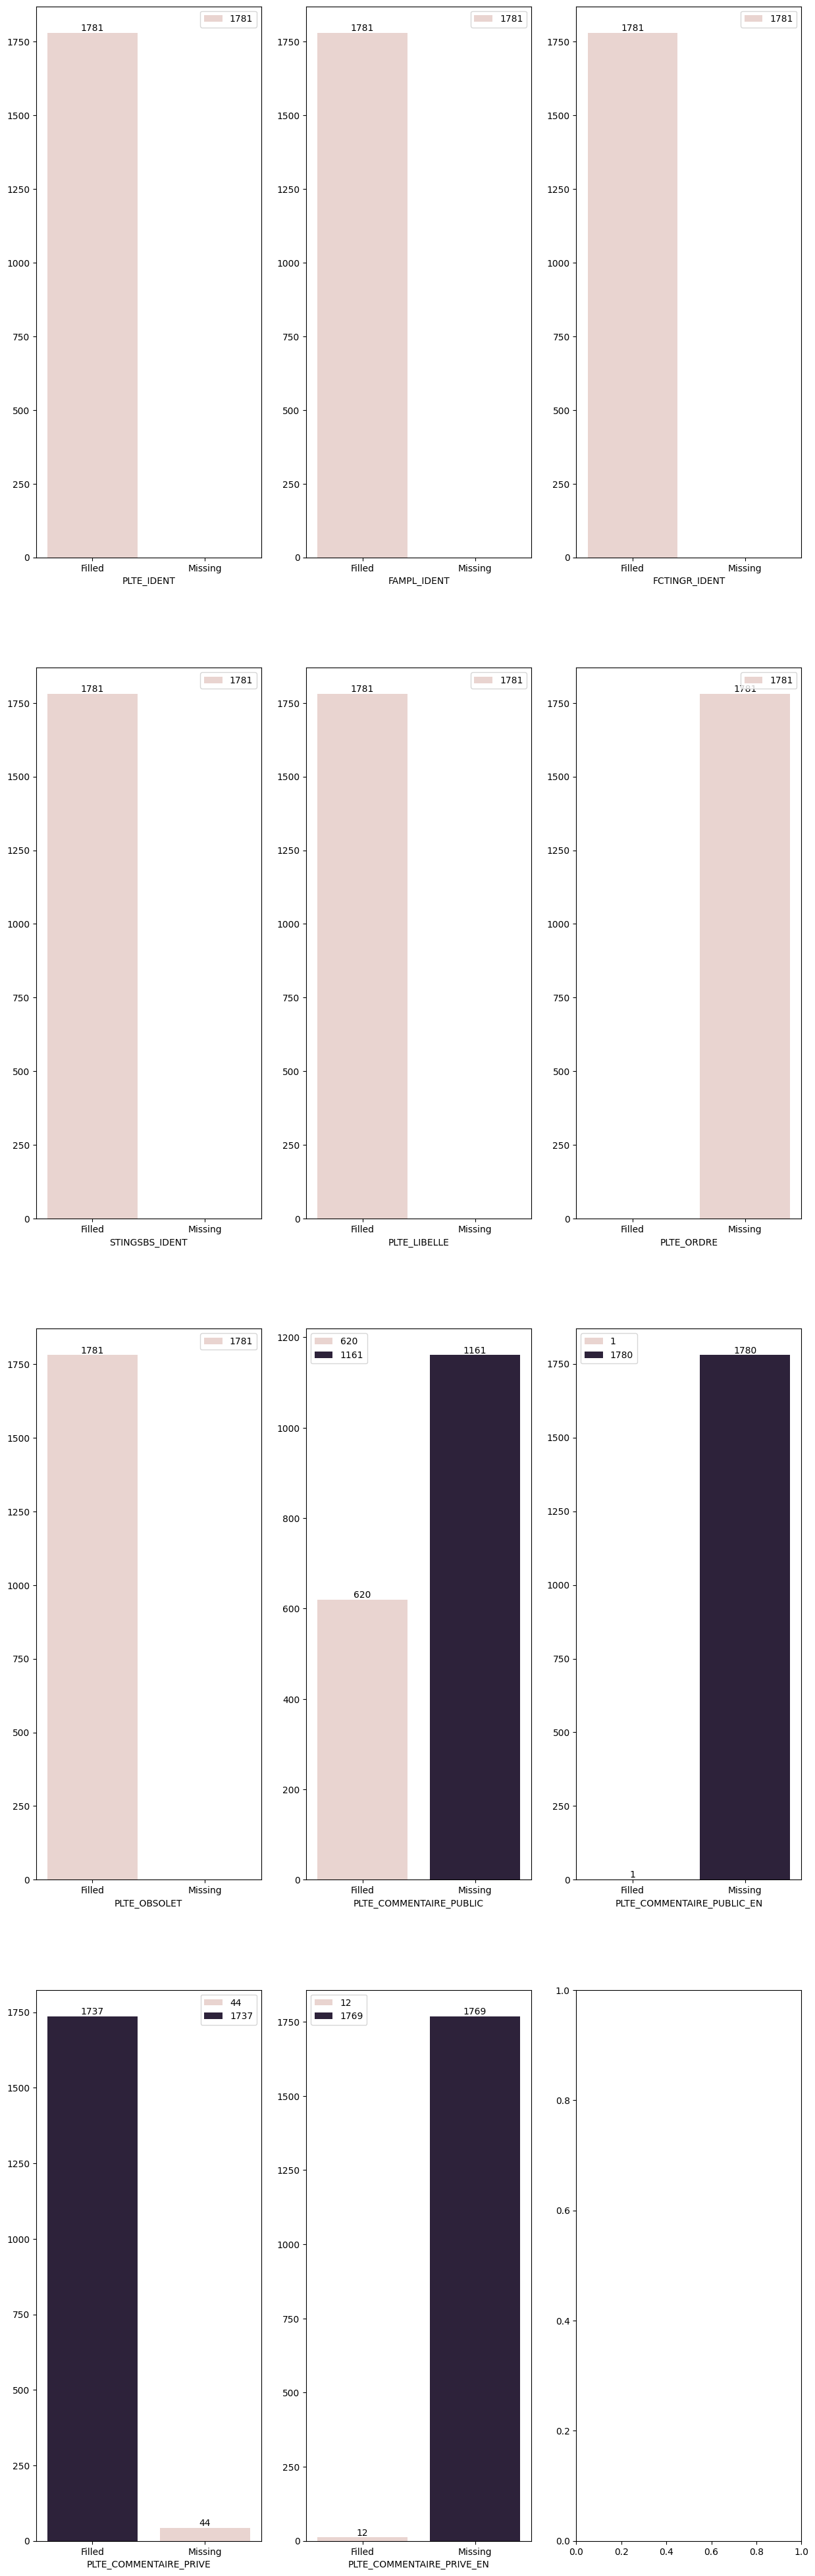

In [74]:
fig, ax = plt.subplots(4, 3, figsize = (15, 50))
for i, subplots in zip (filled_plant_df, ax.flatten()):  
  s = filled_plant_df[i].value_counts()
  s = filled_plant_df[i].value_counts().rename_axis(i).rename('count')
  op = sns.barplot(x=s.index, y=s.values, hue=s.values, order=['Filled', 'Missing'], ax = subplots)
  # ajout des count en légende sur chaque bar
  for container in op.containers:
    op.bar_label(container)
plt.show()


In [75]:
# Quel est le plus court libellé ?
plant_df['lenPLTE_LIBELLE'] = plant_df['PLTE_LIBELLE'].apply(lambda x: len(x))
min(plant_df['lenPLTE_LIBELLE'])

9

In [76]:
# Qu'y a t'il dans les colonnes peu remplies ?

for column in plant_columns:
    if (len(plant_df[column].unique()) < 30) and (len(plant_df[column].unique()) > 1) :
        print(column, len(plant_df[column].unique()))
        for elem in plant_df[column].unique():
            print(f"\t{elem}")


STINGSBS_IDENT 3
	1
	3
	2
PLTE_OBSOLET 2
	0
	1
PLTE_COMMENTAIRE_PUBLIC_EN 2
	nan
	The designation of the novel food on the labelling of the foodstuffs containing it shall be ‘Sacha inchi oil (Plukenetia volubilis)’
PLTE_COMMENTAIRE_PRIVE_EN 13
	nan
	Pas de restrictions indiquées dans la liste DGCCRF
	The claim may be used only for food which contains 1 g of glucomannan per quantified portion. In order to bear the claim information shall be given to the consumer that the beneficial effect is obtained with a daily intake of 3 g of glucomannan in three doses of 1 g each, together with 1-2 glasses of water, before meals and in the context of an energy-restricted diet. Warning of choking to be given for people with swallowing difficulties or when ingesting with inadequate fluid intake - advice on taking with plenty of water to ensure substance reaches stomach.
	Belfrit : contains estrogen-like compounds that disrupt the female hormonal reproductive system and suppress the normal menstrual c

In [77]:
plant_df['PLTE_COMMENTAIRE_PRIVE'].unique()

# Belfit
# Arrêté plante
# Liste B de la 
# Arrête Italie 
# Algue


# insérer un tag "à revoir" -> équivalent de "draft"


array(['Belfrit',
       'Arrêté plante ; feuille à inscrire (Belfrit) La feuille contient des lactones diterpéniques (andrographolide et molécules proches) qui, à fortes doses, ont des effets négatifs sur la fertilité. Compte tenu des effets associés à cette plante, elle est déconseillée chez les personnes suivant un traitement contre le diabète ou prenant des anticoagulants. Certaines personnes, en général multi-allergiques, sont allergiques à la plante et à ses extraits. Il est préférable d’éviter de consommer cette plante ou ses extraits lors d’une grossesse, lors d’un allaitement ainsi que chez l’enfant. L’information concernant un complément alimentaire contenant une préparation issue de la feuille d’Andrographis paniculata devrait comporter : un avertissement visant à éviter que les femmes enceintes et allaitantes et les enfants ne consomment le produit, - une recommandation à l’attention des personnes sous traitement antidiabétique ou anticoagulant afin qu’elles ne consomment p

In [78]:
plant_df['PLTE_COMMENTAIRE_PUBLIC'].unique()

# Avis Anses/EMA (bulbe) : 
# déconseillé chez
# Novel Food // nouvel aliment // historique de consommation avant
# Avis Anses/EMA

array([nan,
       'L’information concernant un complément alimentaire contenant une préparation issue de la feuille d’Andrographis paniculata devrait comporter : - un avertissement visant à éviter que les femmes enceintes ne consomment le produit (déconseillé aux femmes enceintes). ',
       "L'étiquetage doit comporter un avertissement déconseillant l'emploi chez les femmes enceintes",
       'Les concentrations en  alcaloïdes et en coumarine sont à surveiller.',
       "La concentration en estragol et en asarone est à surveiller. L'emploi chez les femmes enceintes est déconseillé.",
       'Dès lors qu’une préparation de sureau est mise en œuvre, la teneur en cyanure d’hydrogène (HCN) du produit fini doit être connue et sa présence doit donner lieu à une analyse de risque spécifique. Par ailleurs, l’information concernant un complément alimentaire contenant une préparation issue de l’une de ces deux plantes devrait comporter un avertissement visant à éviter que les femmes enceintes 

## Demande PR 110

* C'est quoi le nombre maximum et moyen de substances par élément ? Un trop grand nombre de substances risque de créer une colonne trop grande et trop d'espace blanc. Potentiellement cette info on peut la bouger à un display en ligne.
* Combien d'éléments n'ont ni commentaires publics, ni description ? L'affichage est assez vide quand c'est le cas. À enrichir par la suite avec d'autres composants une fois qu'on aura la liaison avec les personas, etc.


In [84]:
substance_df_to_append = substance_df[['SBSACT_COMMENTAIRE_PUBLIC', 'SBSACT_COMMENTAIRE_PUBLIC_EN']]
substance_df_to_append.columns = ['COMMENTAIRE_PUBLIC', 'COMMENTAIRE_PUBLIC_EN']
substance_df_to_append['TYPE'] = 'substance'


plant_df_to_append = plant_df[['PLTE_COMMENTAIRE_PUBLIC', 'PLTE_COMMENTAIRE_PUBLIC_EN']]
plant_df_to_append.columns = ['COMMENTAIRE_PUBLIC', 'COMMENTAIRE_PUBLIC_EN']
plant_df_to_append['TYPE'] = 'plante'


/tmp/ipykernel_9429/2330291533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  substance_df_to_append['TYPE'] = 'substance'
/tmp/ipykernel_9429/2330291533.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant_df_to_append['TYPE'] = 'plante'


In [86]:
ingredient_df = pd.read_csv("../raw_data/REF_ICA_INGREDIENT_AUTRE.csv")
ingredient_df_to_append = ingredient_df[['INGA_COMMENTAIRE_PUBLIC', 'INGA_COMMENTAIRE_PUBLIC_EN', 'INGA_DESCRIPTION', 'INGA_DESCRIPTION_EN']]

ingredient_df_to_append.columns = ['COMMENTAIRE_PUBLIC', 'COMMENTAIRE_PUBLIC_EN', 'DESCRIPTION', 'DESCRIPTION_EN']
ingredient_df_to_append['TYPE'] = 'ingredient'


/tmp/ipykernel_9429/2586451351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingredient_df_to_append['TYPE'] = 'ingredient'


In [87]:
morganisme_df = pd.read_csv("../raw_data/REF_ICA_MICRO_ORGANISME.csv")
morganisme_df_to_append = morganisme_df[['MORG_COMMENTAIRE_PUBLIC', 'MORG_COMMENTAIRE_PUBLIC_EN']]

morganisme_df_to_append.columns = ['COMMENTAIRE_PUBLIC', 'COMMENTAIRE_PUBLIC_EN']
morganisme_df_to_append['TYPE'] = 'micro-organisme'


/tmp/ipykernel_9429/1896939094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morganisme_df_to_append['TYPE'] = 'micro-organisme'


In [90]:
all_ingredient_df = pd.concat([plant_df_to_append, morganisme_df_to_append, ingredient_df_to_append, substance_df_to_append])
all_ingredient_df

,COMMENTAIRE_PUBLIC,COMMENTAIRE_PUBLIC_EN,TYPE,DESCRIPTION,DESCRIPTION_EN
0,NaN,NaN,plante,NaN,NaN
1,L’information concernant un complément aliment...,NaN,plante,NaN,NaN
2,NaN,NaN,plante,NaN,NaN
3,L'étiquetage doit comporter un avertissement d...,NaN,plante,NaN,NaN
4,Les concentrations en alcaloïdes et en coumar...,NaN,plante,NaN,NaN
...,...,...,...,...,...
844,Les dibenzo-a-Pyrones sont des métabolites sec...,Informations issues d'un article scientifique ...,substance,NaN,NaN
845,NaN,NaN,substance,NaN,NaN
846,NaN,NaN,substance,NaN,NaN
847,NaN,NaN,substance,NaN,NaN


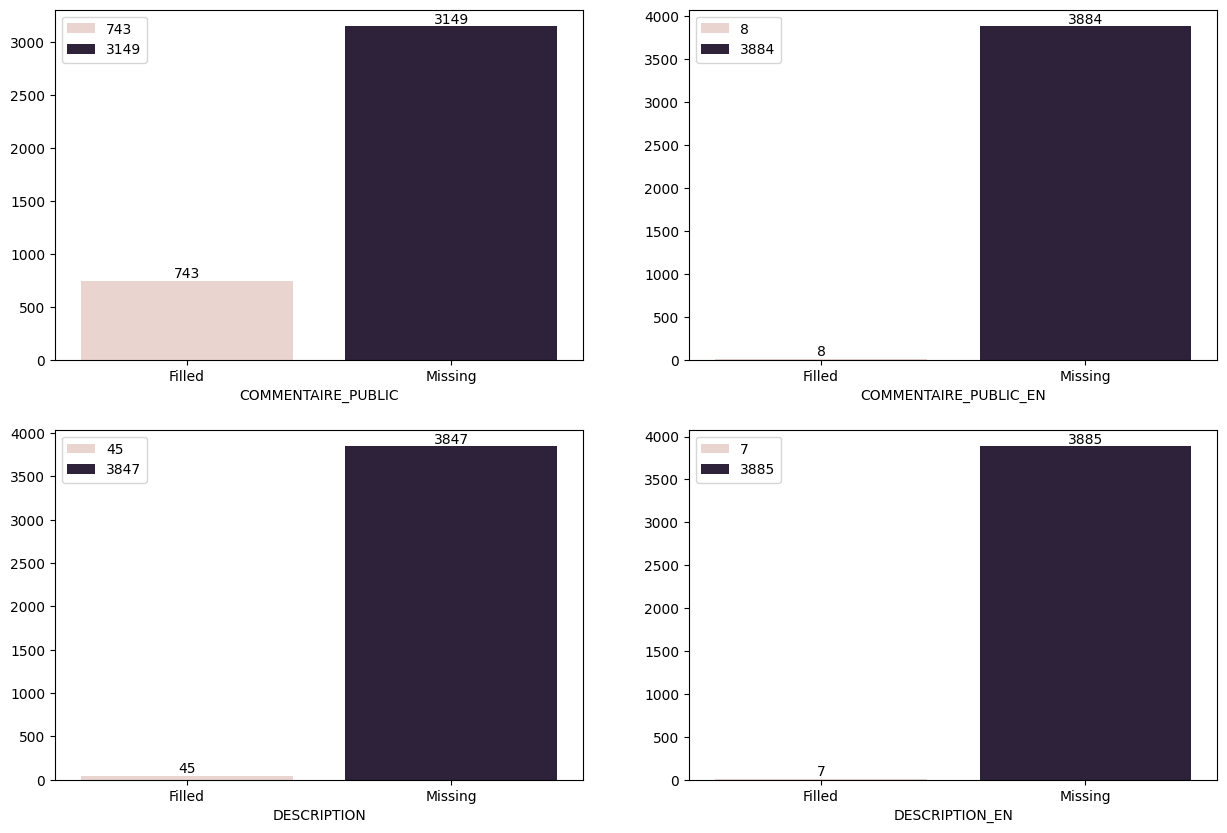

In [102]:
filled_all_ingredient_df = all_ingredient_df.copy()
for column in all_ingredient_df.columns:
    filled_all_ingredient_df[column] = all_ingredient_df[column].apply(lambda x: "Filled" if not pd.isnull(x) else np.nan).fillna("Missing")

all_ingredient_df
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
for i, subplots in zip (filled_all_ingredient_df[['COMMENTAIRE_PUBLIC',	'COMMENTAIRE_PUBLIC_EN', 'DESCRIPTION', 'DESCRIPTION_EN'	]], ax.flatten()):  
  s = filled_all_ingredient_df[i].value_counts().rename_axis(i).rename('count')
  op = sns.barplot(x=s.index, y=s.values, hue=s.values, order=['Filled', 'Missing'], ax = subplots)
  # ajout des count en légende sur chaque bar
  for container in op.containers:
    op.bar_label(container)
plt.show()


In [104]:
filled_all_ingredient_df[[i, 'type']].value_counts().rename_axis(i).rename('count')


KeyError: "['type'] not in index"